<a href="https://colab.research.google.com/github/NUKA-ABHINAY/FMML-Projects-and-Labs/blob/main/Module%201%20Lab%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.Try implementing a few augmentations of your own and experimenting with them

Mounted at /content/drive


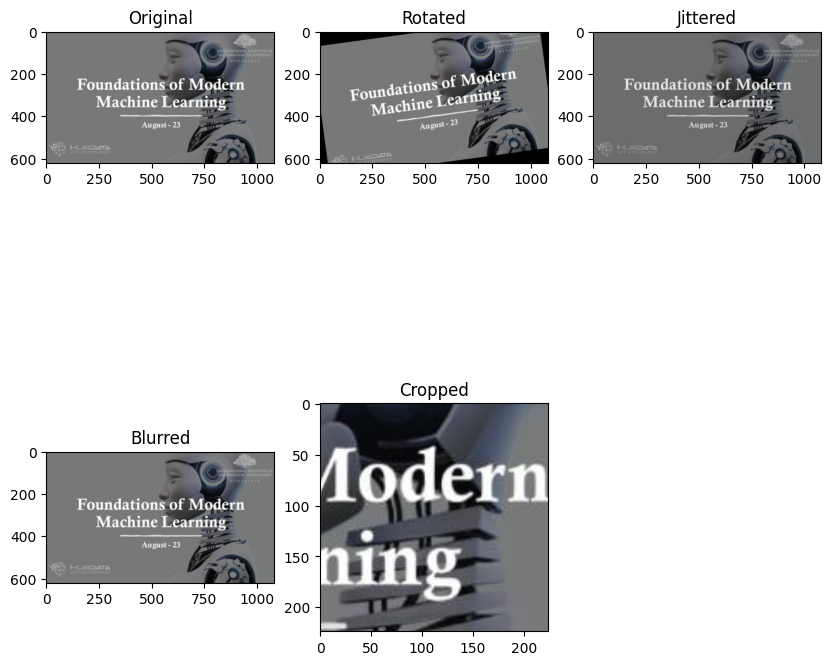

In [ ]:
%pip install opencv-python-headless numpy matplotlib
import cv2
import numpy as np
import io
import matplotlib.pyplot as plt
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Load an example image
image_path = '/content/drive/My Drive/fmml/fmml.jpg'
image = cv2.imread(image_path)
def random_color_jitter(image, brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[..., 1] *= (1.0 + np.random.uniform(-saturation, saturation))
    hsv[..., 2] *= (1.0 + np.random.uniform(-brightness, brightness))
    hsv[..., 0] += np.random.uniform(-hue, hue)
    hsv[hsv > 255] = 255
    hsv[hsv < 0] = 0
    image = cv2.cvtColor(np.array(hsv, dtype=np.uint8), cv2.COLOR_HSV2BGR)
    return image
def random_gaussian_blur(image, max_kernel_size=5):
    kernel_size = np.random.randint(1, max_kernel_size // 2) * 2 + 1  # Ensure it's an odd number
    image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return image
def random_crop(image, crop_size=(224, 224)):
    h, w = image.shape[:2]
    x = np.random.randint(0, w - crop_size[0] + 1)
    y = np.random.randint(0, h - crop_size[1] + 1)
    cropped_image = image[y:y + crop_size[1], x:x + crop_size[0]]
    return cropped_image
def random_rotation(image, max_angle=15):
    angle = np.random.uniform(-max_angle, max_angle)
    h, w = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated_image
# Apply custom augmentations
jittered_image = random_color_jitter(image)
blurred_image = random_gaussian_blur(image)
cropped_image = random_crop(image)
rotated_image = random_rotation(image)
# Display the original and augmented images
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(jittered_image, cv2.COLOR_BGR2RGB)), plt.title('Jittered')
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)), plt.title('Cropped')
plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)), plt.title('Rotated')
plt.show()

# 2.Can you increase the accuracy by increasing the number of augmentations from each sample?

Ans:

A machine learning model's accuracy may be improved by increasing the amount of augmentations from each sample, especially in situations where data augmentation helps the model become more robust, regular, and general. There are, however, a few crucial things to remember:

Overfitting can happen when too many augmentations are used on a single sample, which increases the likelihood of overfitting. When a model overspecializes in training data and performs badly on untrained data, it is said to have overfitted. The training data should be augmented in a way that maintains some degree of similarity to the data your model will encounter in the actual world while also introducing some variation.

Resources for computation: Increasing the amount of augmentations per sample can greatly raise the computational cost of training.

Impact of Augmentations : Not all augmentations will enhance model performance. Some augmentations might not be necessary for your task or possibly be detrimental. To determine how augmentations impact model performance, it is crucial to properly choose and test them.

Hyperpagrameter Tuning: To make sure the model converges properly when you increase the amount of augmentations, you might need to change additional hyperparameters like the learning rate.

Computational Resources: Increasing the number of augmentations per sample can significantly increase the computational cost of training, as each augmented sample must be processed separately during training. This can slow down training and may require more memory and processing power.

Data Distribution: It's important to consider the distribution of augmented data. If you apply too many augmentations, you might create a dataset where certain augmented samples dominate the training data, potentially biasing the model.
Domain-Specific Considerations: The impact of augmentations can vary depending on the specific domain and dataset. What works well for one task may not work as effectively for another.

In practice, it's advisable to start with a moderate number of augmentations and monitor the model's performance on a validation set. You can then gradually increase the number of augmentations while keeping an eye on metrics like validation accuracy. This iterative approach helps strike the right balance between data augmentation and preventing overfitting.

Additionally, techniques like cutout, mixup, and dropout can also be used in conjunction with data augmentation to regularize models and improve their accuracy without relying solely on increasing the number of augmentations from each sample